# Fourier Spectrograms

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy.fft import fft, fftfreq, fftshift

In [2]:
def spectrogram(sol, L, numfreqs=400):
    """
    Compute the spectrogram of a solution with window size L.
    """
    
    xf = fftfreq(L)[:numfreqs]
    ylist = []
    for i in range(0,len(sol),L):
        data_window = sol[i:i+L]
        yf = fft(data_window)
        ylist.append(np.abs(yf)[:numfreqs])
    
    return xf, np.stack(ylist,axis=0)

In [3]:
def plot_spectrogram(tsol, xsol, L, numfreqs=400):
    
    xf, ylist = spectrogram(xsol, L, numfreqs)
    
    fig, ax = plt.subplots(2,1, figsize=(8,8), gridspec_kw={'height_ratios': [1, 4]})
    ax[0].plot(tsol, xsol)
    ax[1].imshow(ylist.T, origin='lower')
    
    plt.tight_layout()

## Bifurcations

### Van der Pol

In [4]:
with open("Output/VdP_xsol.pkl", 'rb') as f:
    soldict = pickle.load(f)
    tsol = soldict["tsol"]
    xsol = soldict["xsol"]

In [5]:
L = 1000

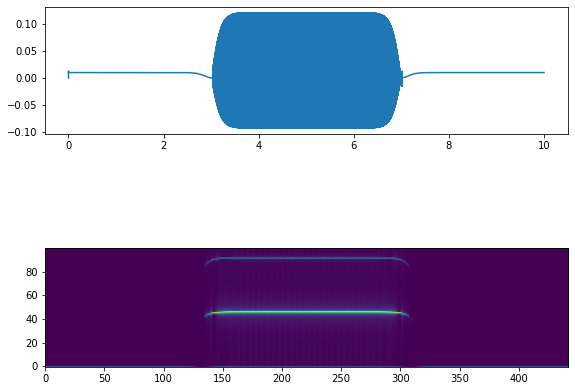

In [6]:
plot_spectrogram(tsol, xsol, L, numfreqs=100)
plt.savefig("Output/VdP_spectrum.png")

### Hopf

In [7]:
with open("Output/Hopf_xsol.pkl", 'rb') as f:
    soldict = pickle.load(f)
    tsol = soldict["tsol"]
    xsol = soldict["xsol"]

In [8]:
subsample = 20
step = 1/(subsample * 44150.0)
w = 5
prop = 300

In [9]:
L = 1000

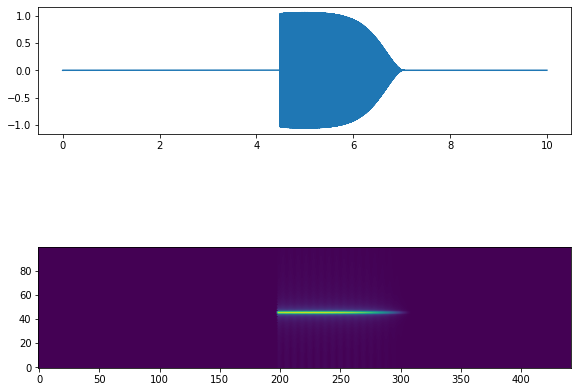

In [10]:
plot_spectrogram(tsol, xsol, L, numfreqs=100)
plt.savefig("Output/Hopf_spectrum.png")

### SNILC

In [11]:
with open("Output/SNILC_xsol.pkl", 'rb') as f:
    soldict = pickle.load(f)
    tsol = soldict["tsol"]
    xsol = soldict["xsol"]

In [12]:
L = 1000

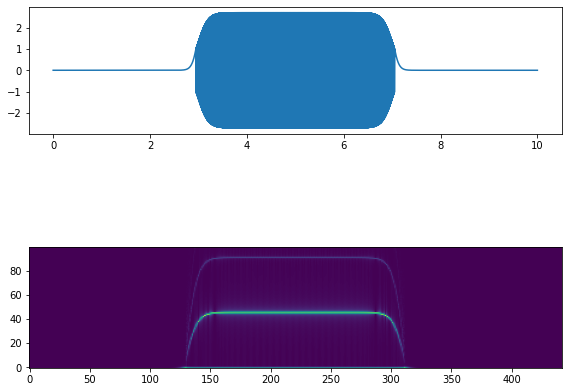

In [13]:
plot_spectrogram(tsol, xsol, L, numfreqs=100)
plt.savefig("Output/SNILC_spectrum.png")

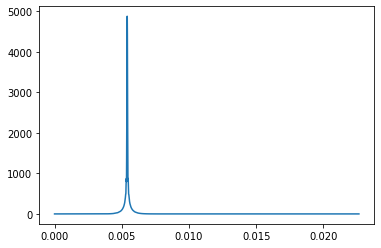

In [208]:
yf = fft(xsol)
xf = fftfreq(len(xsol))
plt.plot(xf[:10000],abs(yf[:10000]))

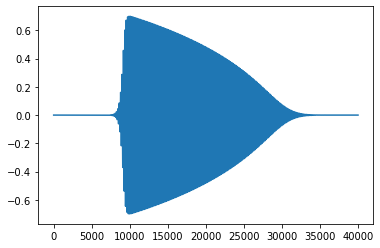

In [9]:
ar = np.argmin(xsol)
centered_xsol = xsol[ar-10000:ar+30000]
plt.plot(centered_xsol)

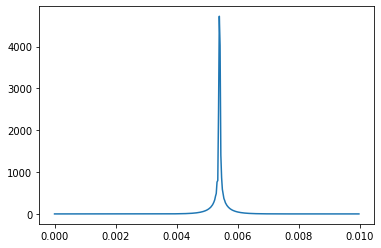

In [96]:
yf = fft(centered_xsol)
xf = fftfreq(len(centered_xsol))
plt.plot(xf[:400],abs(yf[:400]))

In [98]:
xf[np.argmax(yf)]

0.005425

In [185]:
len(centered_xsol)

40000

In [238]:
xf, ylist = spectrogram(xsol, L, numfreqs=100)
ylist.shape

(442, 100)

In [262]:
int(len(xf)/len(locs))

14

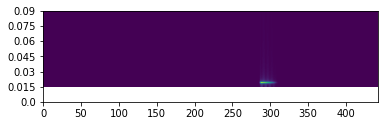

In [267]:
plt.imshow(ylist.T, origin='lower')
locs, labels = plt.yticks()
plt.yticks(locs, xf[::int(len(xf)/len(locs))+1])
plt.show()

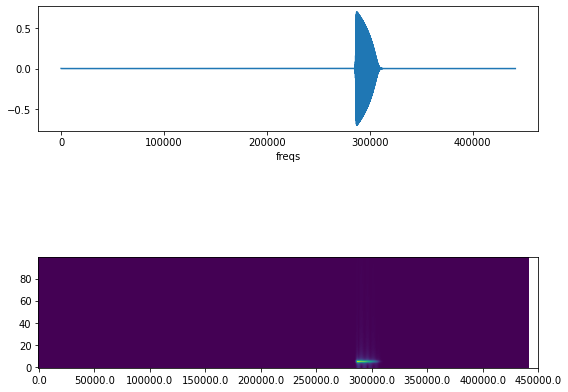

In [276]:
fig, ax = plt.subplots(2,1, figsize=(8,8), gridspec_kw={'height_ratios': [1, 4]})
ax[0].plot(xsol)
ax[1].imshow(ylist.T, origin='lower')
#ax[1].set_yticks(xf)
xlocs = ax[1].get_xticks()
ax[1].set_xticks(xlocs[1:],xlocs[1:]*L)
#ax[1].set_xlim(min(xlocs),max(xlocs))

ax[0].set_xlabel('t')
ax[0].set_ylabel('x')
ax[0].set_xlabel('freqs')
ax[0].set_ylabel('')

plt.tight_layout()

In [274]:
xlocs

array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400., 450.])

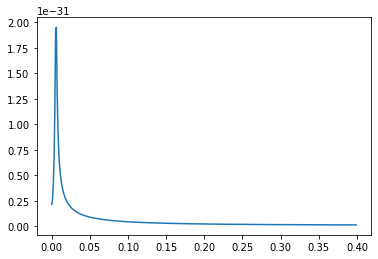

In [216]:
plt.plot(xf,ylist[10,:])

In [205]:
xf[np.argmax(ylist[10,:])]

0.006

In [217]:
def discrete_fourier(sol):
    N = len(sol)

    freqs = []
    for k in range(N):
        
        F_k = 0
        for n in range(N):
            F_k += sol[n] * np.exp(k/N *n * 1j)

        freqs.append(F_k)
        
    return freqs

In [218]:
discrete_fourier(centered_xsol)

KeyboardInterrupt: 

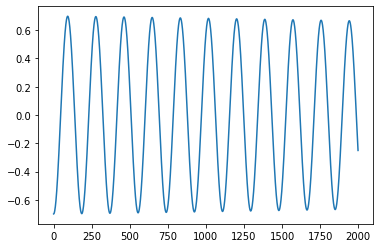

In [219]:
plt.plot(centered_xsol[10000:12000])

In [220]:
freq = discrete_fourier(centered_xsol[10000:12000])

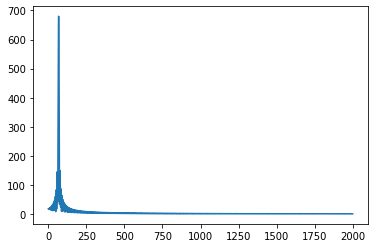

In [221]:
plt.plot(np.abs(freq))
#plt.plot(np.imag(freq))

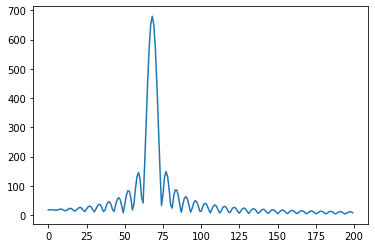

In [222]:
plt.plot(np.abs(freq)[:200])
#plt.plot(np.imag(freq))

In [226]:
np.argmax(np.abs(freq))/len(centered_xsol)

0.0017

In [229]:
w * prop * step

1324500000.0

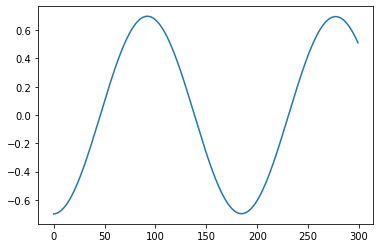

In [65]:

plt.plot(centered_xsol[10000:10300])

In [90]:
T = np.argmin(centered_xsol[10010:10300]) + 10
T

185

In [72]:
centered_xsol[10185]

-0.6972962934842311

In [92]:
wf = 1/T
wf

0.005405405405405406